In [48]:
from bpd.diagnostics import get_pc_fig
from bpd.save_load import load_samples

from chainconsumer import Chain, ChainConfig, ChainConsumer, PlotConfig, Truth, make_sample

import matplotlib.pyplot as plt 

## Single Gal Only Flux

In [5]:
samples = load_samples("../experiments/samples/single_gal_flux.hdf5", groups=['run_0'])

In [7]:
lf = samples['run_0']['lf']
lf.shape

(1000, 1000)

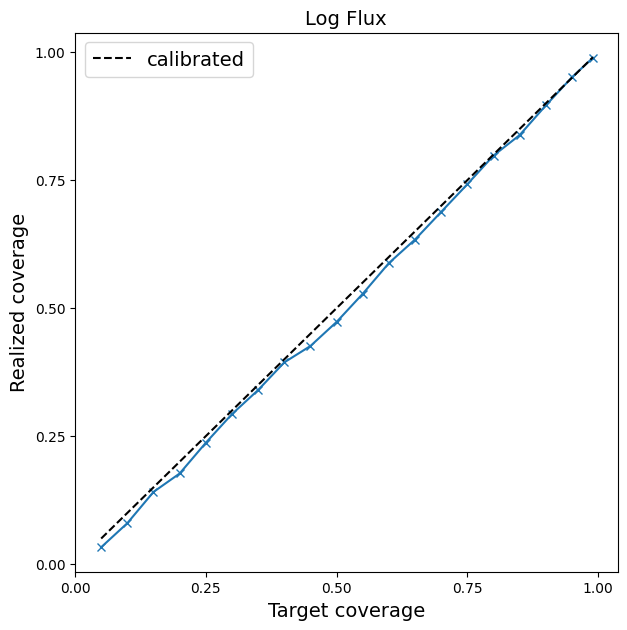

In [11]:
fig, ax =plt.subplots(1, 1, figsize=(7,7))
get_pc_fig(ax, lf, 5, param_name='Log Flux')

## Single Galaxy (all parameters)

In [38]:
import pandas as pd

In [22]:
samples = load_samples("../experiments/samples/single_gal.hdf5", groups=['run_0'])

In [23]:
samples['run_0'].keys()

dict_keys(['g1', 'g2', 'hlr', 'lf', 'x', 'y'])

In [24]:
samples['run_0']['g1'].shape

(10, 1000)

In [25]:
res = samples['run_0']

In [26]:
TRUTH = {'lf': 5, 'g1': 0.02, 'g2':0.0, 'hlr': 0.9, 'x':0, 'y':0}

In [74]:
res['hlr'][3,:].mean()

0.910908

Parameter lf in chain Posterior is not constrained
Parameter x in chain Posterior is not constrained
Parameter y in chain Posterior is not constrained


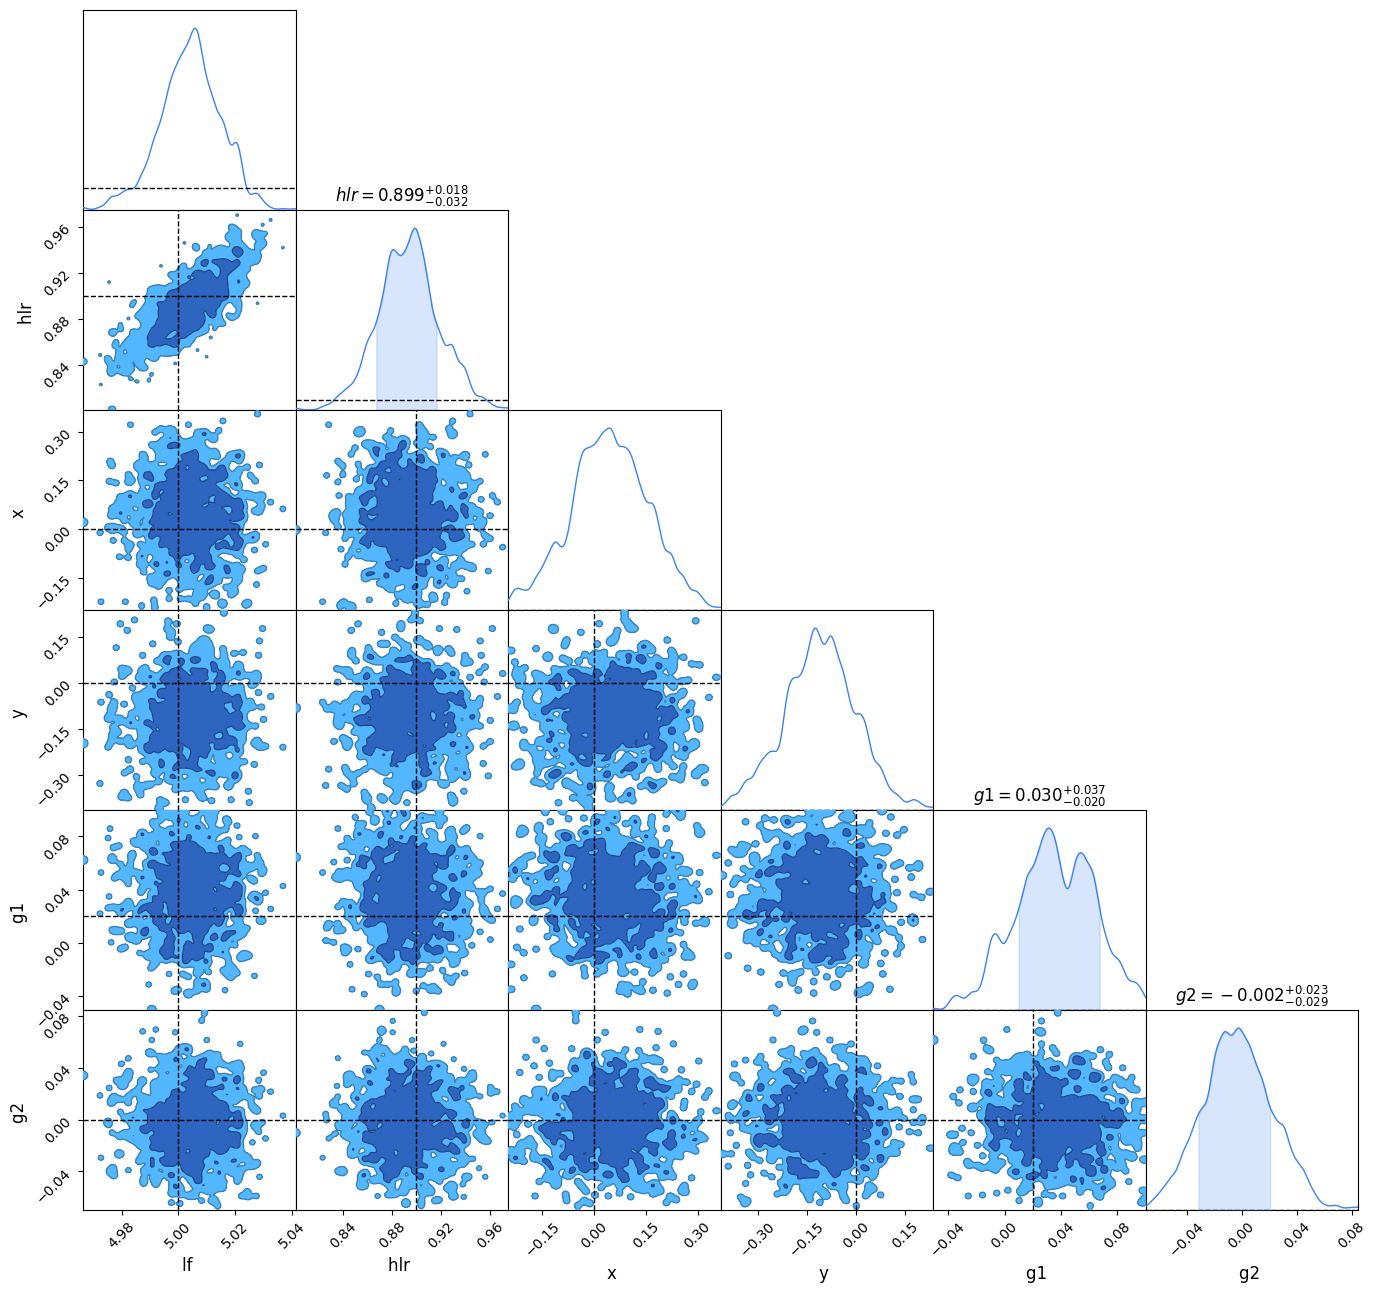

In [70]:
# example of corner plots
c = ChainConsumer()
samples = {k:res[k][5, :] for k in ['lf', 'hlr', 'x', 'y', 'g1', 'g2']}
df =pd.DataFrame.from_dict(samples)
c.add_chain(
    Chain(samples=df,
    name='Posterior')
)
c.add_truth(Truth(location=TRUTH))
fig = c.plotter.plot()

In [35]:
samples['lf'].shape

(1000,)

,lf,hlr,x,y,g1,g2
0,5.031498,0.975071,0.088532,-0.316087,0.027321,0.026556
1,5.029716,0.978135,0.100289,-0.280830,0.033514,0.006187
2,5.021358,0.955153,-0.018714,-0.266064,0.025740,0.000630
3,5.030104,0.939645,-0.015711,-0.331263,0.027722,-0.000797
4,5.019895,0.970261,-0.016625,-0.340352,0.015093,-0.032569
...,...,...,...,...,...,...
995,5.025502,0.936418,0.084932,-0.326240,0.024939,0.016712
996,5.024681,0.942145,0.005804,-0.270005,0.069690,0.011264
997,5.037740,0.965591,0.080829,-0.386130,0.014362,-0.001256
998,5.028406,0.942612,-0.035512,-0.321093,0.034625,0.006658
